In [1]:
%pylab inline
import seaborn as sns;sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
from collections import defaultdict
from itertools import chain
sns.set_context('poster',font_scale=1.4)

Populating the interactive namespace from numpy and matplotlib


In [5]:
from desc.imsim import galsim as gs

In [46]:
rng = gs.BaseDeviate()
sensor = gs.sensor.SiliconSensor(rng=rng)
obj = gs.Gaussian(flux=9000, sigma=1.3)
#obj = gs.Exponential(half_light_radius=2, flux=10000)
im = gs.Image(32, 32, scale=0.3)
drawn = obj.drawImage(im, method='phot', poisson_flux=False, sensor=sensor, rng=rng, offset=(4,4))

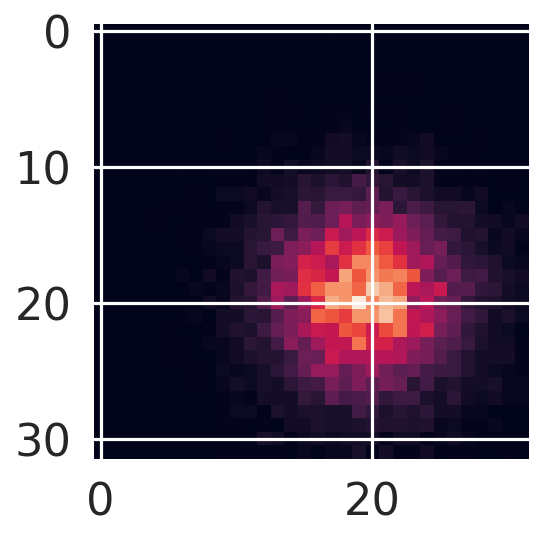

In [47]:
plt.imshow(drawn.array)

In [48]:
drawn.array[15]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  5.,  5.,  9., 10.,
       26., 15., 29., 26., 46., 37., 43., 51., 47., 36., 30., 24., 17.,
       15.,  8.,  9.,  2.,  4.,  2.], dtype=float32)

In [8]:
moms_bfe = gs.hsm.FindAdaptiveMom(drawn)
moms_bfe.moments_sigma

4.382821559906006

In [9]:
nobfe = obj.drawImage(im, method='phot', poisson_flux=False, rng=rng, sensor=None)

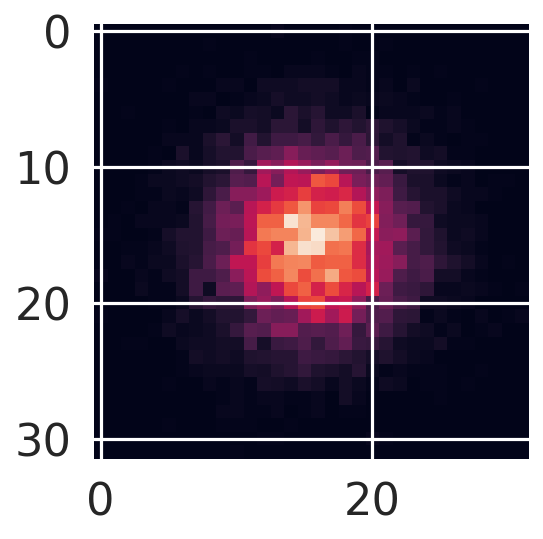

In [10]:
plt.imshow(nobfe.array)

In [11]:
moms = gs.hsm.FindAdaptiveMom(nobfe)
moms.moments_sigma

4.335999965667725

In [73]:
np.stack((something, drawn.array))

NameError: name 'something' is not defined

In [ ]:
try: del with_bfe, without_bfe
except: pass
offsets = np.random.uniform(-4,4, (1000000,2))
fluxes = np.random.uniform(9000,12500, 1000000)
for offset, flux in zip(offsets, fluxes):
    rng = gs.BaseDeviate()
    sensor = gs.sensor.SiliconSensor(rng=rng)
    obj = gs.Gaussian(flux=9000, sigma=1.3)
    #obj = gs.Exponential(half_light_radius=2, flux=10000)
    im = gs.Image(32, 32, scale=0.3)
    drawn = obj.drawImage(im, method='phot', poisson_flux=False, sensor=sensor, rng=rng, offset=(4,4))
    try: with_bfe = np.stack((with_bfe, drawn.array))
    except: with_bfe = drawn.array
    nobfe = obj.drawImage(im, method='phot', poisson_flux=False, rng=rng, sensor=None)
    try: without_bfe = np.stack((without_bfe, nobfe.array))
    except: without_bfe = nobfe.array

In [ ]:
np.save('with_bfe.npy', with_bfe)
np.save('without_bfe.npy', without_bfe)

In [66]:
with_bfe[20]

array([ 0.,  0.,  0.,  1.,  3.,  1.,  8.,  9., 14., 19., 17., 36., 32.,
       38., 33., 53., 48., 35., 43., 35., 21., 24., 18., 11.,  4.,  1.,
        2.,  4.,  1.,  0.,  0.,  0.], dtype=float32)

TypeError: Invalid dimensions for image data

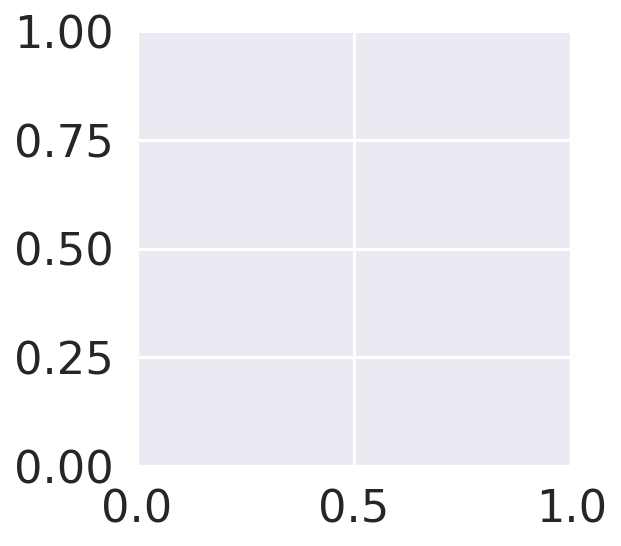

In [63]:
plt.imshow(with_bfe[20])